In [26]:
import os
from astropy.table import Table
from astropy.stats import mad_std
from scipy.stats import sem, tmean, tsem

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [27]:
out_dir = '/data2/deep_galaxy_models/results_realnvp/'

stamps_path = os.path.join(out_dir, 'postage_stamps.fits')
cat_real_path = os.path.join(out_dir, 'catalog_real.fits')
cat_mock_path = os.path.join(out_dir, 'catalog_mock.fits')
cat_param_path = os.path.join(out_dir, 'catalog_param.fits')


cat = Table.read(stamps_path)    
print("Done loading postage stamps")

m_real = Table.read(cat_real_path)
m_mock = Table.read(cat_mock_path)
m_param = Table.read(cat_param_path)
print("Done loading morphology statistics")

# Remove offensive objects
mask_r = m_real['flag']
mask_m = m_mock['flag']
mask = mask_r & mask_m

Done loading postage stamps
Done loading morphology statistics


In [36]:
import seaborn as sns
sns.set()
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2})

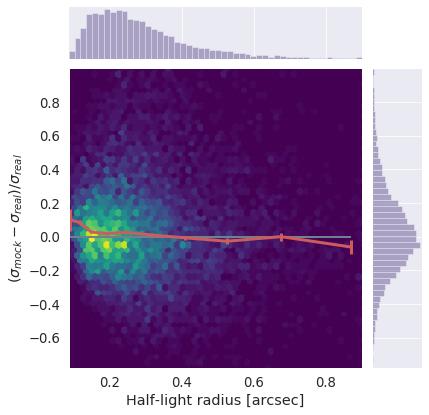

In [58]:
res=0.03 # pixel scale in arcsec
m = mask & (cat['flux_radius'] < 30) & (abs((m_real['sigma_e'] - m_mock['sigma_e'])/ m_real['sigma_e'])< 1)

g = sns.jointplot(cat['flux_radius'][m]*res, -(m_real['sigma_e'][m] - m_mock['sigma_e'][m])/ m_real['sigma_e'][m],
                  gridsize=50, kind='hex',
                  cmap='viridis', color=plt.cm.viridis(0.15))
g.ax_joint.hlines(0,cat['flux_radius'][m].min()*res,29*res,color="slategrey",lw=2)
g.ax_joint.xaxis.set_label_text('Half-light radius [arcsec]');
g.ax_joint.yaxis.set_label_text('$(\sigma_{mock} - \sigma_{real}) / \sigma_{real}$');

err_rel = -(m_real['sigma_e'][mask] - m_mock['sigma_e'][mask])/m_real['sigma_e'][mask]
n = 10
b = logspace(log10(3),log10(29),n)*res
inds = digitize(cat['flux_radius'][mask]*res, b)
res_m = zeros(n)
res_std = zeros(n)
for i in range(n):
    res_m[i] = median(array(err_rel[inds == i]))
    res_std[i] = 1.2533*sem(array(err_rel[inds == i]))
g.ax_joint.errorbar(b,res_m, res_std, color='indianred',lw=3)
savefig("Figures/Figure_size_error.pdf", bbox_inches = 'tight', pad_inches = 0)

<Figure size 432x288 with 0 Axes>

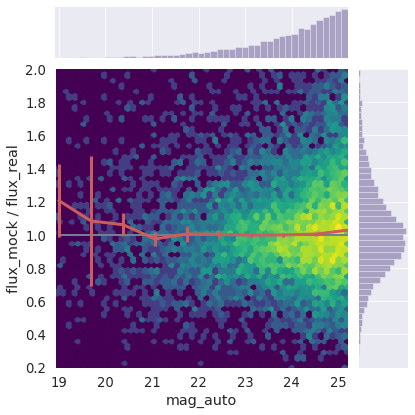

In [59]:
figure()
m = mask & (cat['mag_auto'] > 18.9 ) & (m_mock['amp'] / m_real['amp'] < 2)

g = sns.jointplot(cat['mag_auto'][m],clip(m_mock['amp'][m] / m_real['amp'][m],0.,2),
              gridsize=50, kind='hex', bins='log',
              ylim=(0.2,2),
              cmap='viridis', color=plt.cm.viridis(0.15))

g.ax_joint.hlines(1, 19,25.2,color="slategrey",lw=2)
g.ax_joint.xaxis.set_label_text('mag_auto');
g.ax_joint.yaxis.set_label_text('flux_mock / flux_real');

err_rel = (m_mock['amp'][mask] / m_real['amp'][mask])
n = 10
b = linspace(19,25.2,n)
inds = digitize(cat['mag_auto'][mask], b)
res_m = zeros(n)
res_std = zeros(n)
for i in range(n):
    res_m[i] = median(array(err_rel[inds == i]))
    res_std[i] = 1.2533*sem(array(err_rel[inds == i]))
g.ax_joint.errorbar(b,res_m, res_std, color='indianred',lw=3)
savefig("Figures/Figure_flux_error.pdf", bbox_inches = 'tight', pad_inches = 0)